In [184]:
# Data processing
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Evaluating Performance
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from scikitplot.metrics import plot_ks_statistic, confusion_matrix

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

source_csv = '/home/andris/GitHub/data/churn_prediction/usr_with_tch_complete.csv'

In [3]:
# Reading the dataframe 
df = pd.read_csv(source_csv)

# Show the first 5 rows
df.head()

,user_id,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
0,0009111939b7d071597369a67002b22853c08e19f463cf...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
1,0009111939b7d071597369a67002b22853c08e19f463cf...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
2,0009111939b7d071597369a67002b22853c08e19f463cf...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
3,0009111939b7d071597369a67002b22853c08e19f463cf...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
4,0009111939b7d071597369a67002b22853c08e19f463cf...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11.0,...,110.0,0.0,4.0,79.0,0.0,1.0,4.0,87.0,1.0,0.0


In [4]:
# Remove users who didn't have any activity in month 0
min_months = df.groupby('user_id')['event_leg'].min()
min_months = min_months[min_months == 0]

# Update the dataframe
df = df.set_index('user_id').loc[min_months.index]

df.head()

,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,0.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,0.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,0.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11.0,0.0,...,110.0,0.0,4.0,79.0,0.0,1.0,4.0,87.0,1.0,0.0


## Predicting churn after month 0

Users last month of activity can be in month 0, after which some leave the platform, here we predict the users that leave

In [205]:
# Find the churn month of each user
churn_array = df.groupby('user_id')['event_leg'].max()

# Define last_month of user activity
last_month = 0

# Remove all rows that have data after those months
df_lm = df[df['event_leg']<=last_month]

# Adapt churn_array appropriately 
churn_array = churn_array[churn_array>=last_month]

# Create labels for churn and not churn
label = [0 if item > last_month else 1 for item in churn_array]

# Checking the lengths (they have to be the same)
print(len(label))
print(len(np.unique(df.index)))

# Print dataframe
df.head()

8749
8749


,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,0.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,0.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,0.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11.0,0.0,...,110.0,0.0,4.0,79.0,0.0,1.0,4.0,87.0,1.0,0.0


(array([ 6307.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2442.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

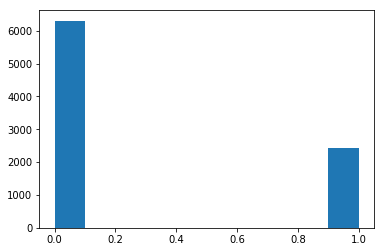

In [206]:
# Fill the nan
df_lm = df_lm.fillna(0)

plt.hist(label)

In [207]:
# Assign data to auxillary variables
X = df_lm.drop('event_leg',axis=1)
y = label

# Storing the keys
store_keys = X.keys

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [231]:
# Do a test with a Dummy Classifier

clf = DummyClassifier(strategy='uniform')
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate

print(classification_report(y_pred,y_test))


             precision    recall  f1-score   support

          0       0.52      0.73      0.60      1347
          1       0.50      0.29      0.36      1278

avg / total       0.51      0.51      0.49      2625



In [229]:
print('Original confusion matrix')
print(confusion_matrix(y_test, y_pred,labels=[1,0]))

y_pred2 = [1 if item > 0.1 else 0 for item in y_score[:,1]]

def calculate_errors(y_test,y_pred):

    true_pos = 0;
    true_neg = 0
    false_neg = 0;
    false_pos = 0
    for item in range(len(y_test)):

        if y_test[item] == 1:

            if y_test[item] == y_pred[item]:
                true_pos +=1

            else:
                false_neg +=1

        if y_test[item] == 0:

            if y_test[item] == y_pred[item]:
                true_neg +=1

            else:
                false_pos += 1

    print('True positives:',true_pos)
    print('True negatives:',true_neg)
    print('False negatives:',false_neg)
    print('False positives:',false_pos)

print('@ 0.5')
calculate_errors(y_test,y_pred)
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))


print('@ change')
calculate_errors(y_test,y_pred2)
print('Precision is:',precision_score(y_test,y_pred2))
print('Recall is:',recall_score(y_test,y_pred2))



Original confusion matrix
[[ 216  520]
 [ 514 1375]]
@ 0.5
True positives: 216
True negatives: 1375
False negatives: 520
False positives: 514
Precision is: 0.295890410959
Recall is: 0.29347826087
@ change
True positives: 195
True negatives: 1369
False negatives: 541
False positives: 520
Precision is: 0.272727272727
Recall is: 0.264945652174


(0.0, 1.0)

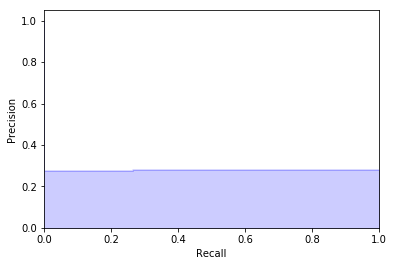

In [230]:
precision, recall, _ = precision_recall_curve(y_test,y_score[:,1])


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


             precision    recall  f1-score   support

          0       0.92      0.89      0.91      1947
          1       0.72      0.78      0.75       678

avg / total       0.87      0.86      0.86      2625



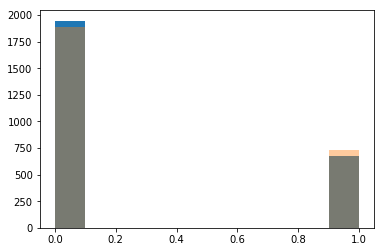

In [214]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))


0.91657687815039013

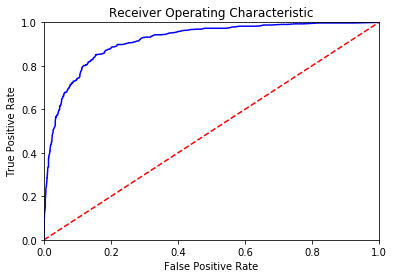

In [215]:
# ROC curve to better guage model performance

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

roc_auc_score(y_test,y_score[:,1])

In [216]:
print('Original confusion matrix')
print(confusion_matrix(y_test, y_pred,labels=[1,0]))

y_pred2 = [1 if item > 0.1 else 0 for item in y_score[:,1]]

def calculate_errors(y_test,y_pred):

    true_pos = 0;
    true_neg = 0
    false_neg = 0;
    false_pos = 0
    for item in range(len(y_test)):

        if y_test[item] == 1:

            if y_test[item] == y_pred[item]:
                true_pos +=1

            else:
                false_neg +=1

        if y_test[item] == 0:

            if y_test[item] == y_pred[item]:
                true_neg +=1

            else:
                false_pos += 1

    print('True positives:',true_pos)
    print('True negatives:',true_neg)
    print('False negatives:',false_neg)
    print('False positives:',false_pos)

print('@ 0.5')
calculate_errors(y_test,y_pred)
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))


print('@ change')
calculate_errors(y_test,y_pred2)
print('Precision is:',precision_score(y_test,y_pred2))
print('Recall is:',recall_score(y_test,y_pred2))



Original confusion matrix
[[ 527  209]
 [ 151 1738]]
@ 0.5
True positives: 527
True negatives: 1738
False negatives: 209
False positives: 151
Precision is: 0.777286135693
Recall is: 0.716032608696
@ change
True positives: 701
True negatives: 1166
False negatives: 35
False positives: 723
Precision is: 0.492275280899
Recall is: 0.952445652174


(0.0, 1.0)

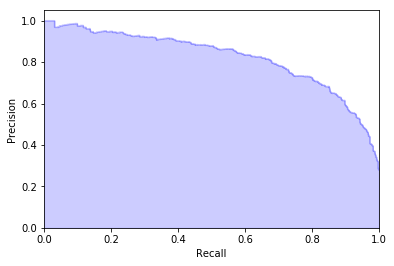

In [217]:
precision, recall, _ = precision_recall_curve(y_test,y_score[:,1])


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


/home/andris/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


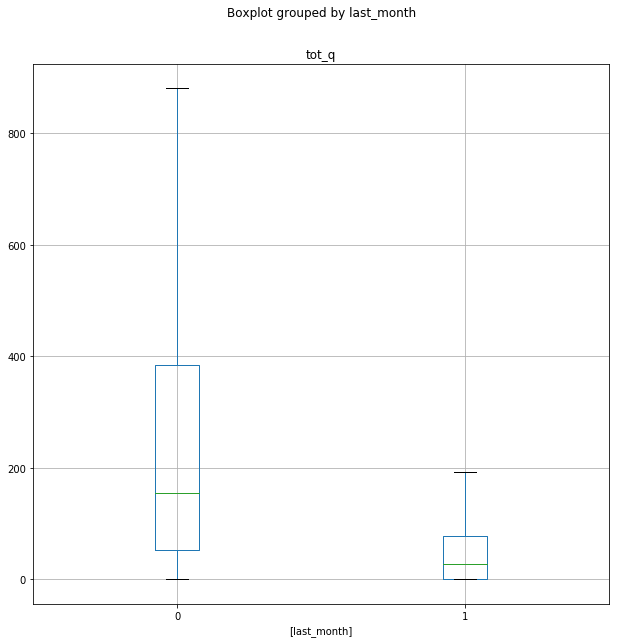

In [11]:
df_new = df_lm
df_new['last_month'] = label

df_new['tot_q'] = df_lm.filter(regex='q_').sum(axis=1) 

df_new[['tot_q','last_month']].boxplot(by='last_month',showfliers=False,figsize=(10,10))

## Predicting churn after month 3

Here we try to do the same as before, but this time employing more months

In [12]:
# Find the churn month of each user
churn_array = df.groupby('user_id')['event_leg'].max()

# Define last_month of user activity
last_month = 3

# Adapt churn_array appropriately 
churn_array = churn_array[churn_array>=last_month]

# Remove all rows that have data after those months
df_lm = df[df['event_leg']<=last_month]

# Remove all users that have already churned
df_lm = df_lm.loc[churn_array.index]

# Create labels for churn and not churn
label = [0 if item > last_month else 1 for item in churn_array]

# Checking the lengths (they have to be the same)
print(len(label))
print(len(np.unique(df_lm.index)))

# Print dataframe
df_lm.head()

5110
5110


,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,0.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,0.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,0.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,0.0,0.0,5.0,2.0,5.0,2.0,3.0,348.0,134.0,0.0,...,55.0,1.0,33.0,477.0,0.0,3.0,66.0,136.0,0.0,13.0


(array([ 4853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   257.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

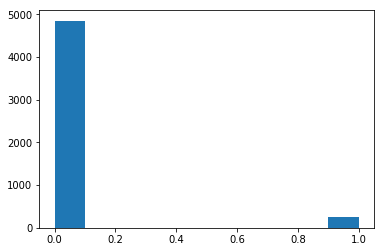

In [13]:
# Checking the distribution
plt.hist(label)

In [14]:
# Now we can choose how to inorporate the timeseries data
# 1) Just sum over all instances
# 2) Put them as additional features
# 3) What else?

# Here we add a function that does this

def prepare_time_series(df, month_array, type_operation, groupby_feature = 'user_id'):
    
    # If we want to append each month as a seperate feature 
    if type_operation == 'append':
        
        # Find the months of interest
        df_new = df[df.index.get_level_values(1).isin(month_array)].unstack().fillna(0)
        
        # Name new columns
        new_cols = [str(item[0]) + '_' + str(int(item[1])) for item in df_new.columns]
        
        # Drop level and rename
        df_new.columns = df_new.columns.droplevel(0)
        df_new.columns = new_cols
    
    # If we want to sum the values of each feature for every month
    elif type_operation == 'sum':
        df_new = df[df.index.get_level_values(1).isin(month_array)]
        df_new = df_new.reset_index().groupby(groupby_feature).sum()
    
    return df_new

### Append the features

Appending the features of each month

In [15]:
# Let's try appending the features

df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum(),[0,1,2,3],'append')

df_lm_new.head()

,grp_add_assig_0,grp_add_assig_1,grp_add_assig_2,grp_add_assig_3,grp_add_assig_tot_0,grp_add_assig_tot_1,grp_add_assig_tot_2,grp_add_assig_tot_3,grp_add_user_0,grp_add_user_1,...,tch_view_assig_prog_tot_2,tch_view_assig_prog_tot_3,view_concept_0,view_concept_1,view_concept_2,view_concept_3,view_hint_0,view_hint_1,view_hint_2,view_hint_3
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,83.0,3.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,0.0,1.0,0.0,0.0,5.0,6.0,6.0,0.0,2.0,0.0,...,140.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,16.0,4.0,16.0,4.0,16.0,20.0,36.0,40.0,28.0,0.0,...,304.0,324.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,0.0,0.0,2.0,1.0,3.0,3.0,5.0,6.0,6.0,1.0,...,67.0,80.0,1.0,5.0,3.0,0.0,6.0,6.0,2.0,50.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475.0,578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

# Assign data to auxillary variables
X = df_lm_new
y = label

# Storing the keys
store_keys = X.keys()

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

In [17]:
# Do a test with a Dummy Classifier

clf = DummyClassifier()
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate

print(classification_report(y_pred,y_test))


             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1456
          1       0.05      0.05      0.05        77

avg / total       0.90      0.91      0.91      1533



             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1499
          1       0.33      0.74      0.45        34

avg / total       0.98      0.96      0.97      1533



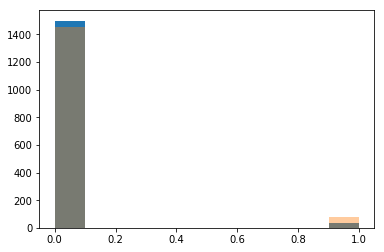

In [18]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))


In [19]:
# Output feature importance

def return_feature_importance(X,y,keys,n_estimators = 100):

    # Using the random forest classifier, find out what are the main features that predict whether a user is likely to churn or not
    randomForest = RandomForestClassifier(n_estimators)
    randomForest.fit(X,y)
    
    importances = randomForest.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    # Print the feature ranking
    print("Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),keys[indices[f]])

return_feature_importance(X,y,store_keys)

Feature ranking:
1. feature 28 (0.030282) q_lvl_0_cor_0
2. feature 88 (0.030121) tch_add_user_0
3. feature 24 (0.029382) q_lvl_0_0
4. feature 123 (0.028570) tch_view_assig_prog_tot_3
5. feature 27 (0.025757) q_lvl_0_3
6. feature 31 (0.025189) q_lvl_0_cor_3
7. feature 87 (0.023124) tch_add_assig_tot_3
8. feature 26 (0.022560) q_lvl_0_2
9. feature 107 (0.021719) tch_attempt_tot_3
10. feature 30 (0.020239) q_lvl_0_cor_2
11. feature 95 (0.018545) tch_add_user_tot_3
12. feature 118 (0.018343) tch_view_assig_prog_2
13. feature 116 (0.017959) tch_view_assig_prog_0
14. feature 25 (0.017890) q_lvl_0_1
15. feature 29 (0.017437) q_lvl_0_cor_1
16. feature 122 (0.017006) tch_view_assig_prog_tot_2
17. feature 117 (0.016249) tch_view_assig_prog_1
18. feature 84 (0.016077) tch_add_assig_tot_0
19. feature 81 (0.015867) tch_add_assig_1
20. feature 92 (0.015702) tch_add_user_tot_0
21. feature 121 (0.015177) tch_view_assig_prog_tot_1
22. feature 8 (0.014813) grp_add_user_0
23. feature 104 (0.014441) tch_a

### Summing

Sum the features and see if there is an improvement in the performance

In [20]:
# Now let's try summing the features


df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum(),[0,1,2,3,4,5],'sum')

df_lm_new.head()

,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,513.0,222.0,4.0,...,439.0,1.0,29.0,282.0,1.0,3.0,61.0,299.0,6.0,5.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,3.0,1.0,17.0,2.0,15.0,2.0,3.0,359.0,145.0,0.0,...,165.0,1.0,45.0,1455.0,0.0,9.0,70.0,412.0,0.0,13.0
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,6.0,40.0,112.0,68.0,192.0,68.0,8.0,276.0,192.0,20.0,...,1012.0,8.0,90.0,2884.0,0.0,24.0,236.0,1016.0,0.0,88.0
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,6.0,3.0,17.0,17.0,51.0,17.0,14.0,76.0,15.0,25.0,...,223.0,1.0,69.0,432.0,0.0,16.0,14.0,279.0,9.0,64.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,6.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,61.0,0.0,...,1267.0,1.0,37.0,365.0,0.0,0.0,578.0,1712.0,0.0,0.0


In [21]:
# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

# Assign data to auxillary variables
X = df_lm_new
y = label

# Storing the keys
store_keys = X.keys

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1512
          1       0.23      0.67      0.35        21

avg / total       0.98      0.97      0.97      1533



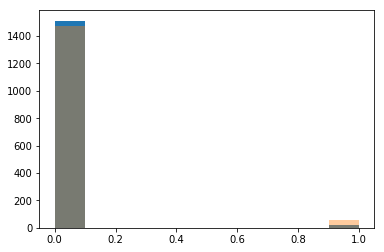

In [22]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))

## Improving upon existing estimates

The code doesn't seem to care what we use which seems to imply that we should do some feature extraction. Here we try to do that.

### Feature extraction

Selecting a subset of features

In [153]:
# Choosing only a subset of features

'''
1. feature 88 (0.033393) tch_add_user_0
2. feature 24 (0.030831) q_lvl_0_0
3. feature 28 (0.029259) q_lvl_0_cor_0
4. feature 31 (0.024299) q_lvl_0_cor_3
5. feature 27 (0.023844) q_lvl_0_3
6. feature 87 (0.023115) tch_add_assig_tot_3
7. feature 123 (0.022500) tch_view_assig_prog_tot_3
8. feature 107 (0.020472) tch_attempt_tot_3
9. feature 84 (0.019868) tch_add_assig_tot_0
10. feature 116 (0.019004) tch_view_assig_prog_0
11. feature 95 (0.018951) tch_add_user_tot_3
12. feature 26 (0.018922) q_lvl_0_2
13. feature 25 (0.018892) q_lvl_0_1
14. feature 30 (0.018834) q_lvl_0_cor_2
15. feature 29 (0.017319) q_lvl_0_cor_1
16. feature 120 (0.017114) tch_view_assig_prog_tot_0
17. feature 118 (0.016905) tch_view_assig_prog_2
18. feature 122 (0.016876) tch_view_assig_prog_tot_2
19. feature 81 (0.016485) tch_add_assig_1
20. feature 86 (0.015722) tch_add_assig_tot_2
21. feature 16 (0.015701) grp_added_0
22. feature 121 (0.015589) tch_view_assig_prog_tot_1
23. feature 117 (0.015447) tch_view_assig_prog_1
24. feature 85 (0.015413) tch_add_assig_tot_1
25. feature 93 (0.014594) tch_add_user_tot_1
26. feature 8 (0.014280) grp_add_user_0
27. feature 104 (0.013961) tch_attempt_tot_0
28. feature 92 (0.013884) tch_add_user_tot_0
29. feature 80 (0.013727) tch_add_assig_0
'''

#features_choice = ['q_lvl_0','tch_view_assig_prog','tch_add_user','tch_add_assig_tot','tch_view_assig_prog_tot','tch_attempt_tot']

features_choice = ['q_lvl_0','tch_view_assig_prog','tch_add_user','tch_add_assig_tot','tch_view_assig_prog_tot','tch_attempt_tot',
                  'tch_add_user_tot','grp_added']

#features_choice = df_lm.drop('event_leg',axis=1).keys().values

df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum()[features_choice],[0,1,2,3,4,5],'append')

df_lm_new.head()

,q_lvl_0_0,q_lvl_0_1,q_lvl_0_2,q_lvl_0_3,tch_view_assig_prog_0,tch_view_assig_prog_1,tch_view_assig_prog_2,tch_view_assig_prog_3,tch_add_user_0,tch_add_user_1,...,tch_attempt_tot_2,tch_attempt_tot_3,tch_add_user_tot_0,tch_add_user_tot_1,tch_add_user_tot_2,tch_add_user_tot_3,grp_added_0,grp_added_1,grp_added_2,grp_added_3
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,321.0,50.0,108.0,34.0,36.0,19.0,4.0,2.0,38.0,1.0,...,75.0,75.0,109.0,110.0,110.0,110.0,0.0,0.0,0.0,0.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,348.0,11.0,0.0,0.0,66.0,0.0,4.0,0.0,13.0,0.0,...,489.0,0.0,55.0,55.0,55.0,0.0,2.0,0.0,0.0,0.0
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,0.0,64.0,108.0,104.0,92.0,28.0,96.0,20.0,70.0,0.0,...,722.0,746.0,226.0,226.0,280.0,280.0,28.0,0.0,40.0,0.0
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,0.0,2.0,61.0,13.0,0.0,0.0,1.0,13.0,6.0,1.0,...,128.0,142.0,50.0,51.0,61.0,61.0,6.0,1.0,10.0,0.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,19.0,39.0,16.0,0.0,275.0,109.0,91.0,103.0,219.0,3.0,...,93.0,93.0,314.0,317.0,318.0,318.0,0.0,0.0,0.0,0.0


In [192]:
# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

# Assign data to auxillary variables
X = df_lm_new
y = label

# Storing the keys
store_keys = X.keys

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

# Count labels
print('Number of 0:',y_test.count(0))
print('Number of 1:',y_test.count(1))

Number of 0: 1459
Number of 1: 74


             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1492
          1       0.38      0.68      0.49        41

avg / total       0.97      0.96      0.97      1533



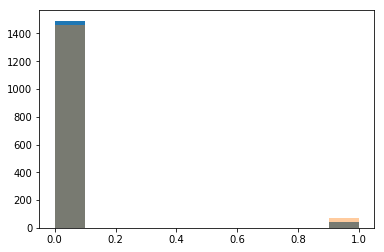

In [193]:
# Train an ML model

#clf = RandomForestClassifier(n_estimators=100, class_weight = {0: 1, 1: 1})
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))

0.89952855528592335

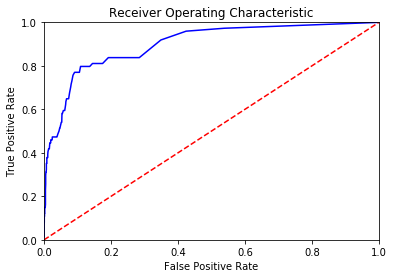

In [194]:
# ROC curve to better guage model performance

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

roc_auc_score(y_test,y_score[:,1])

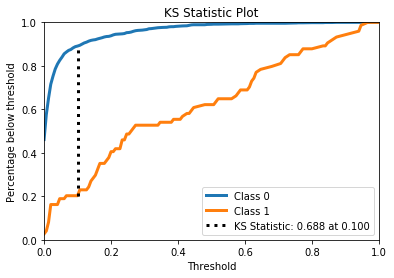

In [195]:
plot_ks_statistic(y_test,clf.predict_proba(X_test)) 

In [196]:
print('Original confusion matrix')
print(confusion_matrix(y_test, y_pred,labels=[1,0]))

y_pred2 = [1 if item > 0.1 else 0 for item in y_score[:,1]]

def calculate_errors(y_test,y_pred):

    true_pos = 0;
    true_neg = 0
    false_neg = 0;
    false_pos = 0
    for item in range(len(y_test)):

        if y_test[item] == 1:

            if y_test[item] == y_pred[item]:
                true_pos +=1

            else:
                false_neg +=1

        if y_test[item] == 0:

            if y_test[item] == y_pred[item]:
                true_neg +=1

            else:
                false_pos += 1

    print('True positives:',true_pos)
    print('True negatives:',true_neg)
    print('False negatives:',false_neg)
    print('False positives:',false_pos)

print('@ 0.5')
calculate_errors(y_test,y_pred)
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))


print('@ change')
calculate_errors(y_test,y_pred2)
print('Precision is:',precision_score(y_test,y_pred2))
print('Recall is:',recall_score(y_test,y_pred2))



Original confusion matrix
[[  28   46]
 [  13 1446]]
@ 0.5
True positives: 28
True negatives: 1446
False negatives: 46
False positives: 13
Precision is: 0.682926829268
Recall is: 0.378378378378
@ change
True positives: 59
True negatives: 1300
False negatives: 15
False positives: 159
Precision is: 0.270642201835
Recall is: 0.797297297297


(0.0, 1.0)

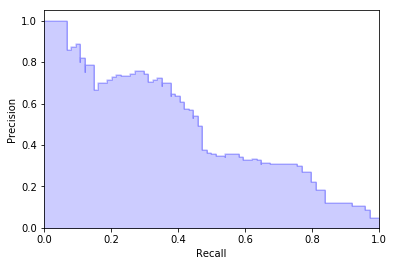

In [197]:
precision, recall, _ = precision_recall_curve(y_test,y_score[:,1])


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


### Balanced Random Forest Classifer

This is meant to be the default solution for calculating churn prediction. 


             precision    recall  f1-score   support

          0       0.74      0.99      0.85      1082
          1       0.89      0.15      0.25       451

avg / total       0.78      0.74      0.67      1533



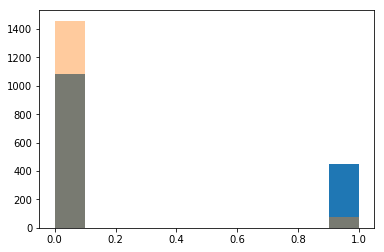

In [200]:
from imblearn.ensemble import BalancedBaggingClassifier

clf = BalancedBaggingClassifier(random_state=42,n_estimators=100,bootstrap=True)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))

0.89707870996424799

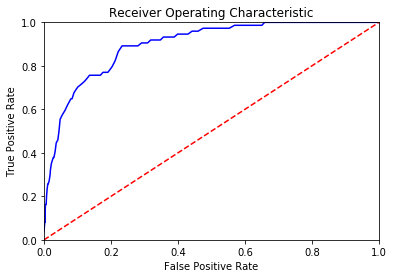

In [201]:
# ROC curve to better guage model performance

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

roc_auc_score(y_test,y_score[:,1])

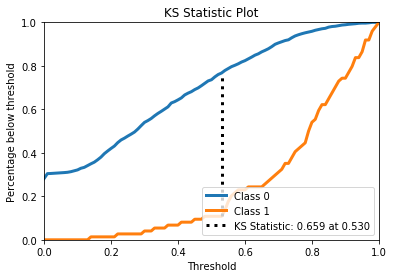

In [202]:
# Plot KS statistic to find place of maximum difference

plot_ks_statistic(y_test,clf.predict_proba(X_test)) 

In [203]:
print('Original confusion matrix')
print(confusion_matrix(y_test, y_pred,labels=[1,0]))

y_pred2 = [1 if item > 0.1 else 0 for item in y_score[:,1]]

def calculate_errors(y_test,y_pred):

    true_pos = 0;
    true_neg = 0
    false_neg = 0;
    false_pos = 0
    for item in range(len(y_test)):

        if y_test[item] == 1:

            if y_test[item] == y_pred[item]:
                true_pos +=1

            else:
                false_neg +=1

        if y_test[item] == 0:

            if y_test[item] == y_pred[item]:
                true_neg +=1

            else:
                false_pos += 1

    print('True positives:',true_pos)
    print('True negatives:',true_neg)
    print('False negatives:',false_neg)
    print('False positives:',false_pos)

print('@ 0.5')
calculate_errors(y_test,y_pred)
print('Precision is:',precision_score(y_test,y_pred))
print('Recall is:',recall_score(y_test,y_pred))


print('@ change')
calculate_errors(y_test,y_pred2)
print('Precision is:',precision_score(y_test,y_pred2))
print('Recall is:',recall_score(y_test,y_pred2))



Original confusion matrix
[[  66    8]
 [ 385 1074]]
@ 0.5
True positives: 66
True negatives: 1074
False negatives: 8
False positives: 385
Precision is: 0.146341463415
Recall is: 0.891891891892
@ change
True positives: 74
True negatives: 469
False negatives: 0
False positives: 990
Precision is: 0.0695488721805
Recall is: 1.0


(0.0, 1.0)

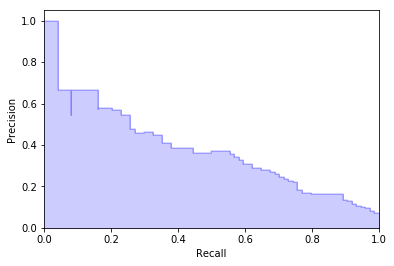

In [204]:
precision, recall, _ = precision_recall_curve(y_test,y_score[:,1])


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
